In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import optimize

In [2]:
def tof_res(df): 

    ToF = []
    counts = []
    x = []
    sigma = []
    vrf = []
    
    for i in range(0, max(df['x_step_idx'])+1): # for i in range 0 to the max value in x_step_idx col (inclusive)
        
        df_i = df.loc[df['x_step_idx']==i] # df_i is a new dataframe that has all rows where the value in df['x_step_idx'] is equal to i
        
        ToF.append(np.average(df_i['tof'])) 
        sigma.append(np.std(df_i['tof']))
        x.append(i) # i is just scan point
        counts.append(len(df_i['tof']))
        
        vrf.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].str.split(',').str[0]]))
        
    return ToF, sigma, x, counts, vrf

In [3]:
df = pd.read_csv("run45387.csv") 

df = df.loc[df['tof']<=130] #apply tof cut to dateframe

ToF, sigma, x, counts, vrf = tof_res(df)

In [4]:
df.head()

,shot,event,tof,ch,pos_x,pos_y,quad_freq,dipole_freq,loop,shot.1,...,step_value_y,step_value_z,step_var_ppg,step_value_ppg,step_var_trapv,step_value_trapv,step_var_epics,step_value_epics,step_value_afg_freq,step_value_afg_volt
0,0,1,89.688403,1.0,-1000.0,-1000.0,0,0,0,1,...,[],[],['Quad voltage'],[0.002336],[],[],[],[],[],[0.002336]
1,1,1,92.361865,1.0,-1000.0,-1000.0,0,0,0,1,...,[],[],['Quad voltage'],[0.002336],[],[],[],[],[],[0.002336]
2,2,1,92.378003,1.0,-1000.0,-1000.0,0,0,0,1,...,[],[],['Quad voltage'],[0.002336],[],[],[],[],[],[0.002336]
3,3,1,95.362280,1.0,-1000.0,-1000.0,0,0,0,1,...,[],[],['Quad voltage'],[0.002336],[],[],[],[],[],[0.002336]
4,4,1,98.398364,1.0,-1000.0,-1000.0,0,0,0,1,...,[],[],['Quad voltage'],[0.002336],[],[],[],[],[],[0.002336]


In [5]:
vrf = np.array(vrf)

def test_func(x, a, b, c, d):
    return a * np.sin(b * (x+d)) + c

# guess = [amplitude, frequency, y offset, phase]
guess = [-1, 150, 90, 2]
params, params_covariance = optimize.curve_fit(test_func, vrf, ToF, guess)

print(params)

[ -0.94604311 150.96753429  88.73696137   1.98539385]


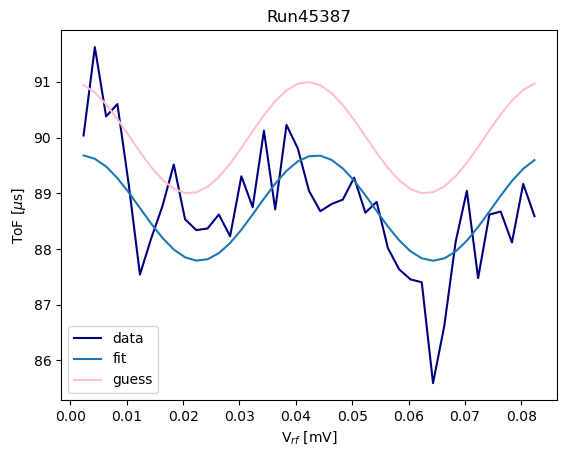

In [6]:
plt.plot(vrf, ToF, label='data', color='navy')

# note: the data isn't sinusoidal but the fit helps us determine the v_rf of the lowest ToF(s)
plt.plot(vrf, test_func(vrf, params[0], params[1], params[2], params[3]), label='fit')
plt.plot(vrf, test_func(vrf, guess[0], guess[1], guess[2], guess[3]), label='guess', color='pink')

plt.title('Run45387')
plt.xlabel('V$_{rf}$ [mV]')
plt.ylabel('ToF [$\mu$s]')

plt.legend(loc='best')
#plt.savefig('run45387.png', dpi = 200)